## OpenCV逐位元邏輯運算
1. 逐位元and運算
2. 逐位元or運算
3. 逐位元not運算
4. 逐位元xor運算

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
%%html 
<style> 
table {float:left} 
</style> 

In [3]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 4.1.2
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## 影像逐位元運算

在8位元三通道影像中，每個像素點包含三個(RGB)0~255的值，在逐位元運算時，會將0~255的值改為二進位的值進行比對。

## 逐位元and運算

and運算可以用串聯來解釋，當兩個開關皆為按下(1)，燈泡才會發光(1)，否則不會發光(0)。
![Imgur](https://i.imgur.com//2V2EZPd.png)

| element1 | element2 | result |      rule      |
| -------- | -------- | ------ | -------------- |
|     0    |     0    |    0   |  and(0, 0) = 0 |
|     0    |     1    |    0   |  and(0, 1) = 0 |
|     1    |     0    |    0   |  and(1, 0) = 0 |
|     1    |     1    |    1   |  and(1, 1) = 1 |

將圖片元素改為二進位表示並進行and運算：


| element  | decimal  |     binary     |
| -------- | -------- | -------------- |
| element1 |    198   |    1100 0110   |
| element2 |    219   |    1101 1011   |
|and result|    194   |    1100 0010   |

圖片做and運算特色:
- 所有值與255運算皆為原值。
- 所有值與0運算皆為0。

在OpenCV中可以使用`cv2.bitwise_and()`函式實現逐位元and運算。

`dst = cv2.bitwise_and(src1, src2[, mask]])`

src1與src2為輸入影像，兩影像維度必須一致，dst為輸出影像，維度會與輸入影像相同，可選參數mask為遮罩。

In [4]:
# 以上述範例測試
img_src1 = np.array([[198]], dtype=np.uint8)
img_src2 = np.array([[219]], dtype=np.uint8)

print("'198' '219' and運算", cv2.bitwise_and(img_src1, img_src2))

'198' '219' and運算 [[194]]


In [5]:
# 測試
img_src1 = np.array([[198]], dtype=np.uint8)
img_src2 = np.array([[255]], dtype=np.uint8)
img_src3 = np.array([[0]], dtype=np.uint8)

print("'198' '255' and運算", cv2.bitwise_and(img_src1, img_src2))
print("'198' '0' and運算", cv2.bitwise_and(img_src1, img_src3))

'198' '255' and運算 [[198]]
'198' '0' and運算 [[0]]


原圖


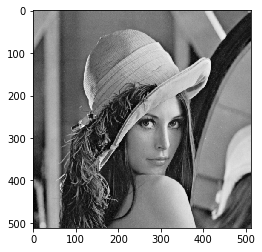

遮罩


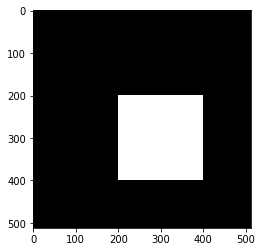

原圖與遮罩and運算


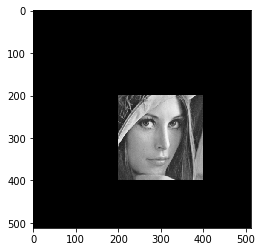

In [6]:
# 將and運算提供的遮罩效果利用在其他圖片上
img_BGR_lenna = cv2.imread('data/Lenna.png')
img_RGB_lenna = cv2.cvtColor(img_BGR_lenna, cv2.COLOR_BGR2RGB)
img_gray_lenna = cv2.cvtColor(img_BGR_lenna, cv2.COLOR_BGR2GRAY)
print('原圖')
plt.imshow(img_gray_lenna, cmap = 'gray')
plt.show()

# 製造一個遮罩，要顯示的區域皆為255，全黑的區域皆為0
mask = np.zeros(img_gray_lenna.shape, dtype = np.uint8)
mask[200:400, 200:400] = 255
print('遮罩')
plt.imshow(mask, cmap = 'gray')
plt.show()
print('原圖與遮罩and運算')
plt.imshow(cv2.bitwise_and(img_gray_lenna, mask), cmap = 'gray')
plt.show()

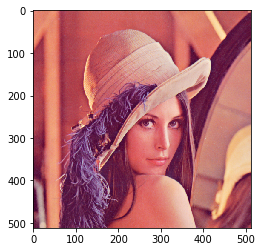

遮罩


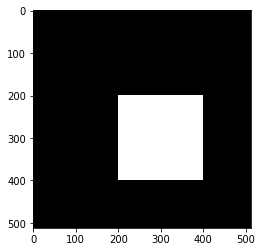

原圖與遮罩and運算


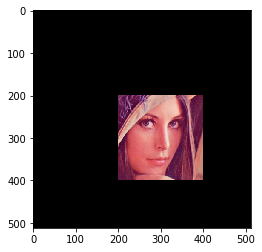

In [7]:
# 將and運算提供的遮罩效果利用在其他彩色圖片上
img_BGR_lenna = cv2.imread('data/Lenna.png')
img_RGB_lenna = cv2.cvtColor(img_BGR_lenna, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB_lenna)
plt.show()

# 製造一個遮罩，要顯示的區域皆為255，全黑的區域皆為0
mask = np.zeros(img_RGB_lenna.shape, dtype = np.uint8)
mask[200:400, 200:400] = 255
print('遮罩')
plt.imshow(mask, cmap = 'gray')
plt.show()
print('原圖與遮罩and運算')
plt.imshow(cv2.bitwise_and(img_RGB_lenna, mask))
plt.show()

## 逐位元or運算

or運算可以用並聯來解釋，當兩個開關其中之一有按下(1)，燈泡就會發光(1)，否則不會發光(0)。
![Imgur](https://i.imgur.com//s5qXGt4.png)

| element1 | element2 | result |      rule     |
| -------- | -------- | ------ | ------------- |
|     0    |     0    |    0   |  or(0, 0) = 0 |
|     0    |     1    |    1   |  or(0, 1) = 1 |
|     1    |     0    |    1   |  or(1, 0) = 1 |
|     1    |     1    |    1   |  or(1, 1) = 1 |

將圖片元素改為二進位表示並進行or運算：


| element  | decimal  |     binary     |
| -------- | -------- | -------------- |
| element1 |    198   |    1100 0110   |
| element2 |    219   |    1101 1011   |
|or result |    223   |    1101 1111   |

圖片做or運算特色:

- 運算結果一定大於等於兩數字最大值。

在OpenCV中可以使用`cv2.bitwise_or()`函式實現逐位元or運算。

`dst = cv2.bitwise_or(src1, src2[, mask]])`

src1與src2為輸入影像，兩影像維度必須一致，dst為輸出影像，維度會與輸入影像相同，可選參數mask為遮罩。

In [8]:
# 以上述範例測試
img_src1 = np.array([[198]], dtype=np.uint8)
img_src2 = np.array([[219]], dtype=np.uint8)

print("'198' '219' or運算", cv2.bitwise_or(img_src1, img_src2))

'198' '219' or運算 [[223]]


## 逐位元not運算

not只針對單一數值運算，將1改為0，將0改為1。

| element | result |     rule    |
| ------- | ------ | ----------- |
|    0    |    1   |  not(0) = 1 |
|    1    |    0   |  not(1) = 0 |

將圖片元素改為二進位表示並進行or運算：


|  element  | decimal  |     binary     |
| --------- | -------- | -------------- |
|  element  |    198   |    1100 0110   |
|not result |     57   |    0011 1001   |

圖片做not運算特色:

- 運算結果與原數值相加為255(以255減去輸入值即為結果)。
- 在二值化圖片中使用逐位元not會黑白交換(invert)。

在OpenCV中可以使用`cv2.bitwise_not()`函式實現逐位元not運算。

`dst = cv2.bitwise_not(src[, mask]])`

src為輸入影像，dst為輸出影像，維度會與輸入影像相同，可選參數mask為遮罩。

In [9]:
# 以上述範例測試
img_src = np.array([[198]], dtype=np.uint8)

print("'198' not運算", cv2.bitwise_not(img_src))

'198' not運算 [[57]]


## 逐位元xor運算

兩值相等為0，兩值相異為1。

| element1 | element2 | result |      rule      |
| -------- | -------- | ------ | -------------- |
|     0    |     0    |    0   |  xor(0, 0) = 0 |
|     0    |     1    |    1   |  xor(0, 1) = 1 |
|     1    |     0    |    1   |  xor(1, 0) = 1 |
|     1    |     1    |    0   |  xor(1, 1) = 0 |

將圖片元素改為二進位表示並進行xor運算：


|  element  | decimal  |     binary     |
| --------- | -------- | -------------- |
| element1  |    198   |    1100 0110   |
| element2  |    219   |    1101 1011   |
|xor result |     29   |    0001 1101   |

圖片做xor運算特色:

- 運算結果一定小於等於兩數字最小值。

在OpenCV中可以使用`cv2.bitwise_xor()`函式實現逐位元xor運算。

`dst = cv2.bitwise_xor(src1, src2[, mask]])`

src為輸入影像，dst為輸出影像，維度會與輸入影像相同，可選參數mask為遮罩。

In [10]:
# 以上述範例測試
img_src1 = np.array([[198]], dtype=np.uint8)
img_src2 = np.array([[219]], dtype=np.uint8)

print("'198' '219' xor運算", cv2.bitwise_xor(img_src1, img_src2))

'198' '219' xor運算 [[29]]


## mask遮罩

OpenCV中許多函式都包含mask參數，上述四個邏輯運算函式也都有一個可選參數mask，此mask為要運算的圖片範圍，此mask維度必須與輸入影像一致，mask為0的位置則不進行運算，直接將值改為0。

有點類似運算完畢後再與只有0與255標記位置的矩陣進行and運算，差異在mask參數只區分為0與非0，and運算如果不是與255進行運算，不會維持原本數值。

In [11]:
# 範例
img_src1 = np.ones((4, 4), dtype = np.uint8) * 3
img_src2 = np.ones((4, 4), dtype = np.uint8) * 5
# 255可以為任何非0數值(1~255)，不影響結果
img_mask = np.array([[  0,   0, 255, 255],
                     [  0,   0, 255, 255],
                     [255, 255, 255, 255],
                     [255, 255, 255, 255]], dtype=np.uint8)
print('img_src1:\n', img_src1)
print('img_src2:\n', img_src2)
print('img_mask:\n', img_mask)
print('img_add:\n', cv2.add(img_src1, img_src2, mask = img_mask))

img_src1:
 [[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
img_src2:
 [[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
img_mask:
 [[  0   0 255 255]
 [  0   0 255 255]
 [255 255 255 255]
 [255 255 255 255]]
img_add:
 [[0 0 8 8]
 [0 0 8 8]
 [8 8 8 8]
 [8 8 8 8]]
